# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Data Loading and Preprocessing

In [5]:
df = pd.read_csv("D:\Machine_Learning\Study_Material\CarPrice_Assignment.csv")

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<font color="green">Dataset containing 26 columns with different datatypes and 205 entries with no null values in all cloumns</font>

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<font color ="green">As there is no duplicated or null values in the data set , no need to handle that</font>

In [26]:
# Drop irrelevant columns
df = df.drop(columns=['car_ID'])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data visualization

fueltype
gas       185
diesel     20
Name: count, dtype: int64


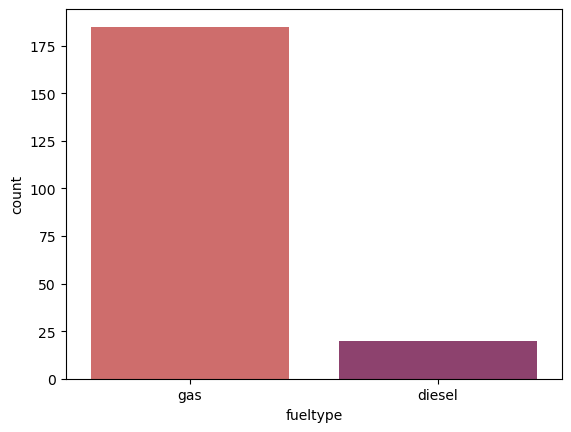

In [19]:
FuelTypeAnalysis = df.fueltype.value_counts(dropna=False)
print(FuelTypeAnalysis)

# Bar Charts Analysis "For Gender feature"
sns.countplot(x="fueltype", data=df, palette="flare")
plt.show()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


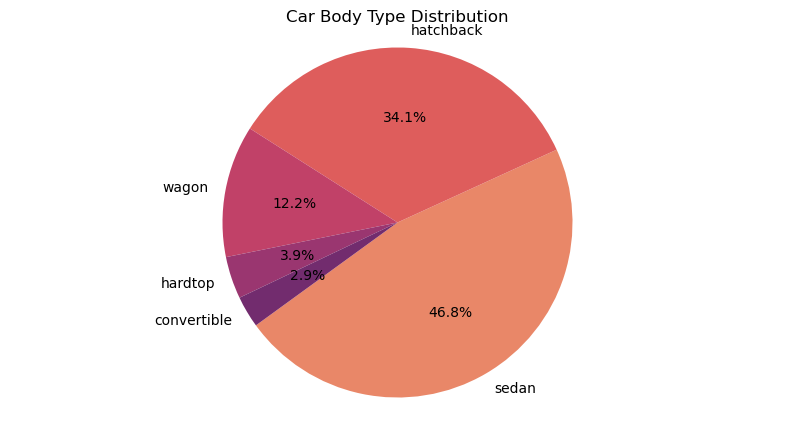

In [22]:
# "dropna" as False to count NaN values
carbodyAnalysis = df.carbody.value_counts(dropna=False)
print(carbodyAnalysis)

# Create a pie chart "For Married feature"
plt.figure(figsize=(10, 5)) # figure in inches

# labels by descending order
plt.pie(carbodyAnalysis, 
        labels=[("sedan"),("hatchback"),("wagon"),("hardtop"),("convertible")], 
        startangle=216, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("flare", 
        len(carbodyAnalysis)))

plt.axis('equal')  # Used to set the aspect ratio of the plot to be equal.
plt.title('Car Body Type Distribution')
plt.show()

### Correlation matrix

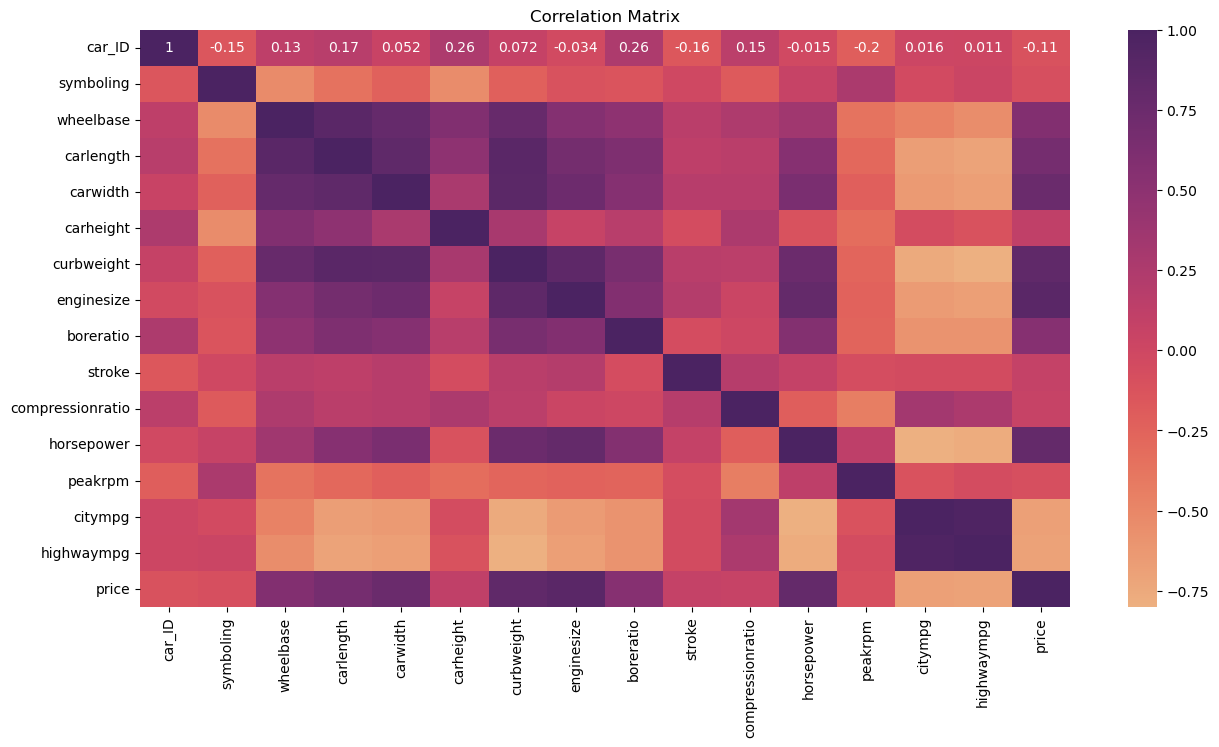

In [23]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

### Data Encoding

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# Feature Importance Analysis

We can perform feature importance analysis on tree-based models like Decision Tree, Random Forest, and Gradient Boosting.

In [48]:
importances = models["Random Forest Regressor"].feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
              Feature  Importance
15        enginesize    0.554026
12        curbweight    0.289695
23        highwaympg    0.045507
20        horsepower    0.032247
1            CarName    0.018794
10          carwidth    0.012669
9          carlength    0.006999
8          wheelbase    0.006762
21           peakrpm    0.005359
22           citympg    0.004550
18            stroke    0.004461
19  compressionratio    0.003847
17         boreratio    0.003695
11         carheight    0.002659
5            carbody    0.002154
16        fuelsystem    0.002093
3         aspiration    0.000924
6         drivewheel    0.000921
13        enginetype    0.000831
0          symboling    0.000685
14    cylindernumber    0.000626
4         doornumber    0.000399
2           fueltype    0.000097
7     enginelocation    0.000003


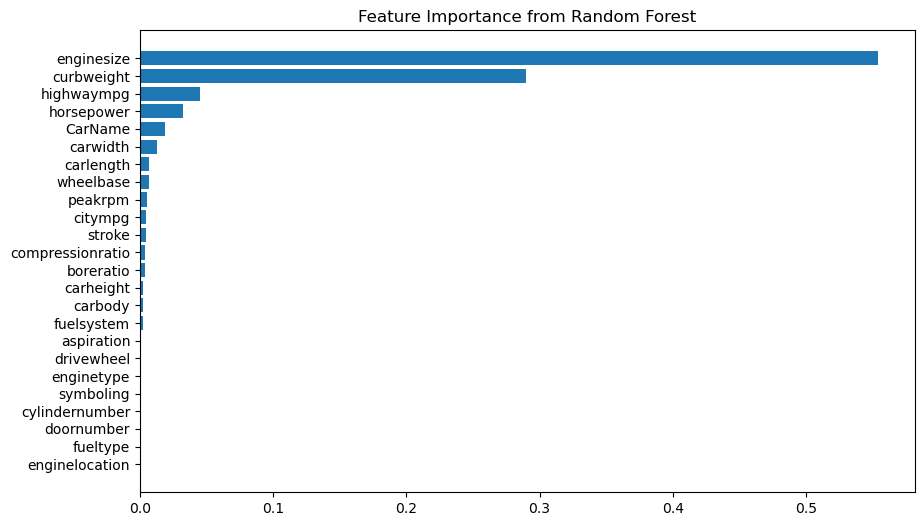

In [49]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

<font color="green">The above graph showing how important each feature is, to predict car price. So the graph says 8 features from aspiration to engineloction doesn't have any impact on predicting price of the car. So we can remove those columns</font>

In [50]:
# Drop irrelevant columns
df = df.drop(columns=['aspiration','drivewheel','enginetype','symboling','cylindernumber','doornumber','fueltype','enginelocation'])
df.head()

,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,3,99.8,176.6,66.2,54.3,2337,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,3,99.4,176.6,66.4,54.3,2824,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int32  
 1   carbody           205 non-null    int32  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   fuelsystem        205 non-null    int32  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
dt

<font color="green">So we have 15 columns left for predicting price of car</font>

### Data splitting

In [52]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

In [53]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[-0.42062808,  0.44967732,  1.02269728, ..., -1.9442653 ,
          0.88574028,  1.20076115],
        [ 0.19040336,  0.44967732,  1.52210877, ..., -0.26296022,
         -0.95301169, -0.98276371],
        [ 1.07028864,  1.61656151, -0.50883128, ..., -0.68328649,
          0.88574028,  0.9096245 ],
        ...,
        [-0.02956796,  0.44967732, -0.70859588, ...,  0.15736606,
          0.88574028,  0.9096245 ],
        [ 1.04584738, -0.71720687,  0.68975629, ...,  0.15736606,
         -0.95301169, -0.98276371],
        [-0.12733299,  1.61656151,  0.27358005, ...,  0.15736606,
         -1.25947035, -1.27390036]]),
 array([[-1.56936720e+00,  4.49677322e-01,  7.89638586e-01,
          1.21479941e+00,  4.63650109e-01,  8.10288200e-01,
          1.29846525e+00,  1.97618448e+00,  8.69567500e-01,
          1.07425208e+00,  4.30217198e-01, -5.40724994e-01,
          1.97433880e+00,  5.77692327e-01, -1.41269968e+00,
         -1.27390036e+00],
        [-1.69157349e+00, -7.17206868e-01,  1.

### Outlier Detection

In [63]:
print("Skewness : ")
for col in df.columns:
    print(f"{col} : {df[col].skew()}")

Skewness : 
CarName : -0.15764876956532678
carbody : -0.6653008847529976
wheelbase : 1.0502137758714858
carlength : 0.1559537713215604
carwidth : 0.904003498786254
carheight : 0.06312273247192804
curbweight : 0.681398189052588
enginesize : 1.9476550452788108
fuelsystem : -0.24299496000231213
boreratio : 0.02015641810424137
stroke : -0.6897045784233837
compressionratio : 2.6108624576151533
horsepower : 1.4053101543373119
peakrpm : 0.07515872237118956
citympg : 0.6637040288148164
highwaympg : 0.5399971878746754
price : 1.7776781560914454


<font color="green">Here compressionratio is having value 2.6 which can be considered as having outliers </font>

C:\Users\joncy\AppData\Local\Temp\ipykernel_10412\3364634687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["compressionratio"],color='r')
C:\Users\joncy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='compressionratio', ylabel='Density'>

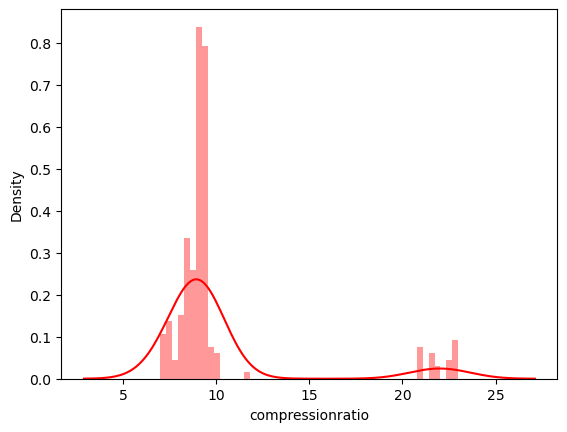

In [64]:
sns.distplot(df["compressionratio"],color='r')

In [92]:
m=df.compressionratio.mean()
m
s=df.compressionratio.std()
s
print(f"Mean : {m}\nStandard Deviation : {s}\n -3sigma : {m-3*s}\n +3sigma : {m+3*s}")

Mean : 10.142536585365855
Standard Deviation : 3.972040321863297
 -3sigma : -1.7735843802240367
 +3sigma : 22.058657550955747


In [93]:
df[(df.compressionratio>-1.7)& (df.compressionratio<23)]

,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_compressionratio,zscore
0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,2.197225,-0.287645
1,3,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,2.197225,-0.287645
2,1,2,94.5,171.2,65.5,52.4,2823,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,2.197225,-0.287645
3,4,3,99.8,176.6,66.2,54.3,2337,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2.302585,-0.035885
4,5,3,99.4,176.6,66.4,54.3,2824,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2.079442,-0.539405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,144,4,104.3,188.8,67.2,57.5,3157,130,5,3.62,3.15,7.5,162,5100,17,22,18950.0,2.014903,-0.665284
200,139,3,109.1,188.8,68.9,55.5,2952,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0,2.251292,-0.161765
201,138,3,109.1,188.8,68.8,55.5,3049,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0,2.163323,-0.363173
202,140,3,109.1,188.8,68.9,55.5,3012,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0,2.174752,-0.337997


In [94]:
df["zscore"]=(df.compressionratio-m)/s

In [96]:
df = df[(df.zscore>-3) & (df.zscore<3)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 204
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CarName               196 non-null    int32  
 1   carbody               196 non-null    int32  
 2   wheelbase             196 non-null    float64
 3   carlength             196 non-null    float64
 4   carwidth              196 non-null    float64
 5   carheight             196 non-null    float64
 6   curbweight            196 non-null    int64  
 7   enginesize            196 non-null    int64  
 8   fuelsystem            196 non-null    int32  
 9   boreratio             196 non-null    float64
 10  stroke                196 non-null    float64
 11  compressionratio      196 non-null    float64
 12  horsepower            196 non-null    int64  
 13  peakrpm               196 non-null    int64  
 14  citympg               196 non-null    int64  
 15  highwaympg            196 no

In [97]:
df=df.drop(["zscore"],axis=1)

In [98]:
df.compressionratio.skew()

3.552164021472246

# Model Implementation

### Model building

In [99]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Dictionary to store the results
results = {}

### Model training

In [100]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "R-squared": r2,
        "MSE": mse,
        "MAE": mae
    }

# Model Evaluation

For model evaluation, we will calculate the R², MSE, and MAE for each model on the test set.

In [125]:
for model_name, metrics in results.items():
    print(f"{model_name}:\n R-squared: {metrics['R-squared']}, MSE: {metrics['MSE']}, MAE: {metrics['MAE']}\n")

Linear Regression:
 R-squared: 0.8545248456961188, MSE: 11484393.618837021, MAE: 2316.3449696709627

Decision Tree Regressor:
 R-squared: 0.883880803894271, MSE: 9166916.241899733, MAE: 2037.642268292683

Random Forest Regressor:
 R-squared: 0.9567460593242408, MSE: 3414639.9958346086, MAE: 1316.664463414634

Gradient Boosting Regressor:
 R-squared: 0.9206753714527817, MSE: 6262205.13230269, MAE: 1744.1949131683427

Support Vector Regressor:
 R-squared: -0.09978705293349965, MSE: 86821612.06995937, MAE: 5694.6293464099035



<font color="green">When we compare different MLmodels, R-squared should be close to zero and MSE, MAE should be minimum for best performance. On the basis of these conditions, Random Forest Regressor is the best performing model on this particular data set, while SVM is the worst performing model</font>

# Hyperparameter Tuning 

In [120]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 1, 6],
    'min_samples_leaf': [1, 2, 4],
}

# Setting up GridSearchCV
grid_search_rf = GridSearchCV(estimator=models["Random Forest Regressor"], param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\joncy\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\joncy\anaconda3\Lib\site-pack

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 1, 6],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

#### Check the best parameters and best score

In [121]:
print("Best Parameters: ", grid_search_rf.best_params_)
print("Best Score: ", grid_search_rf.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.8935230676618691


In [123]:
best_model = grid_search_rf.best_estimator_
y_pred_best = best_model.predict(X_test)


In [124]:

# Performance of the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Performance:\n R-squared: {r2_best}, MSE: {mse_best}, MAE: {mae_best}")

Best Model Performance:
 R-squared: 0.9567460593242408, MSE: 3414639.9958346086, MAE: 1316.664463414634


<font color="green">Hyperparameter Tuning is used to optimize the performance of machine learning models by adjusting their hyperparameters. Hyperparameters are settings that are defined before the learning process begins and are not learned from the data.
For the Random Forest Regressor in this project, hyperparameter tuning helps you find the best combination of hyperparameters, which can significantly improve the model’s performance. In your case, tuning can reduce errors like Mean Squared Error (MSE) and improve metrics like R-squared (R²).
The process searches for the optimal hyperparameters, evaluates performance, and selects the best combination.
After tuning, we see improved performance when comparing the default model vs. the tuned model.</font>